In [25]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ds_toolbox.modelling.time_series_utils as ts
import ds_toolbox.modelling.misc_utils as ds
from ds_toolbox.visualisation import corrplot, bokeh_chart, bokeh_candlestick, plot_colors

from bokeh.plotting import show, output_notebook
output_notebook()

pd.set_option("display.max_columns", None)

Loading BokehJS ...

In [3]:
raw = pd.read_csv("data/presidential_polls.csv")

In [4]:
raw.createddate = pd.to_datetime(raw.createddate)

## Polls vs actuals

### load 2016 actuals

In [61]:
# multindex
state_shares = pd.read_csv("data/processed/state_shares.csv", index_col=[0], header=[0, 1], parse_dates=True)

### single state

In [45]:
state = "Pennsylvania"
plot_df = raw[raw.state == state].set_index("createddate").sort_index()
plot_df = plot_df[["rawpoll_trump", "rawpoll_clinton"]]
plot_df_roll = plot_df.rolling(window=10, min_periods=3).mean()
plot_df_roll.columns = ["trump_ave", "clinton_ave"]
plot_df = plot_df.merge(plot_df_roll, left_index=True, right_index=True, how="left")

# fig = bokeh_chart(plot_df[["rawpoll_trump", "rawpoll_clinton"]],
#                   legend_labels=["rep", "dem"], 
#                   colors=["red", "dodgerblue"], linestyle="line", title=state)
# show(fig)

In [47]:
party_colors = ['red', 'dodgerblue']

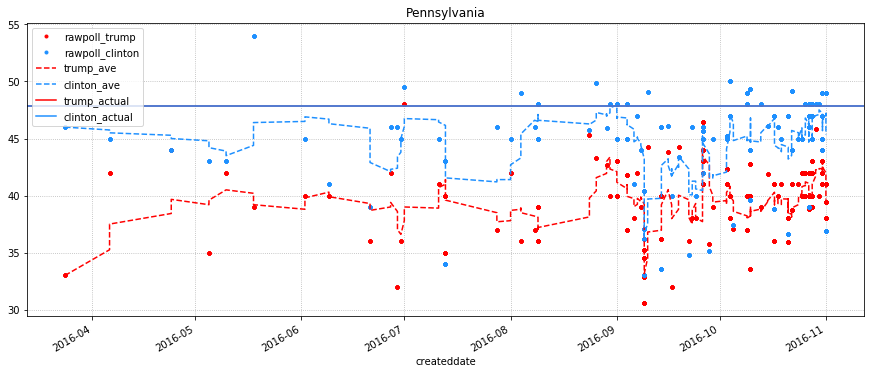

In [79]:
ts.plot(plot_df, style=[".", ".", "--", "--"], color=2*party_colors)
plt.axhline(y=rep_result, linestyle="-", color="red", label="trump_actual");
plt.axhline(y=dem_result, linestyle="-", color="dodgerblue", label="clinton_actual");
plt.title(state)
plt.legend()
plt.show()

### all battlegrounds

In [80]:
battlegrounds = ['Arizona',
 'Colorado',
 'Florida',
 'Georgia',
 'Iowa',
 'Maine',
 'Michigan',
 'Minnesota',
 'Nevada',
 'New Hampshire',
 'New Mexico',
 'North Carolina',
 'Ohio',
 'Pennsylvania',
 'Texas',
 'Virginia',
 'Wisconsin']

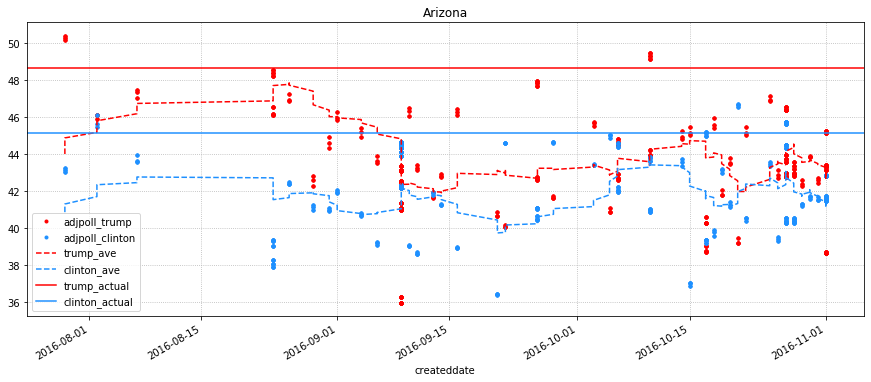

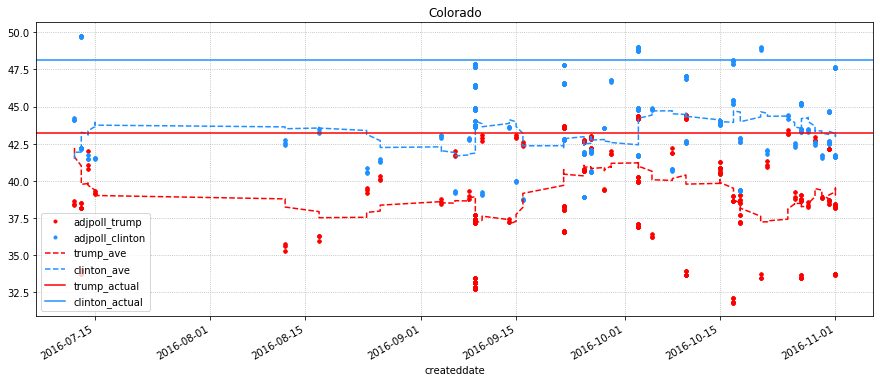

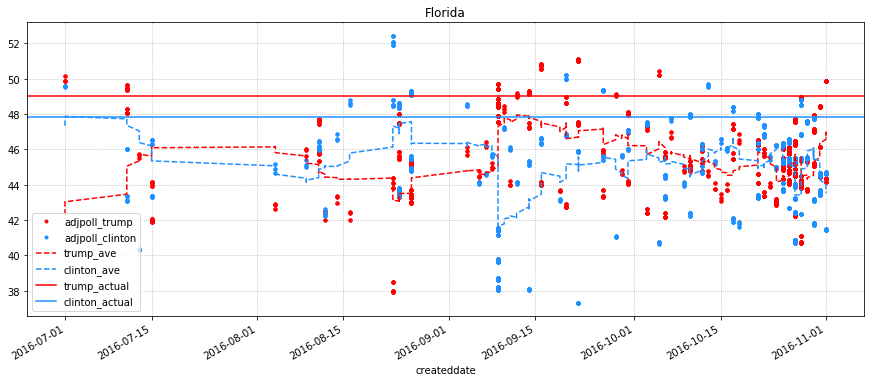

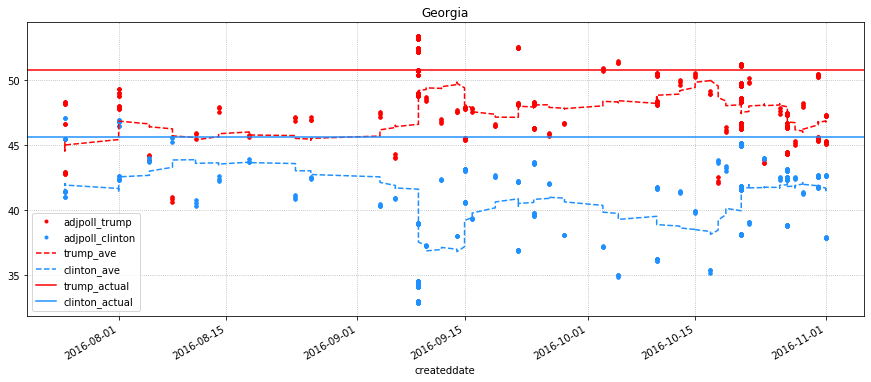

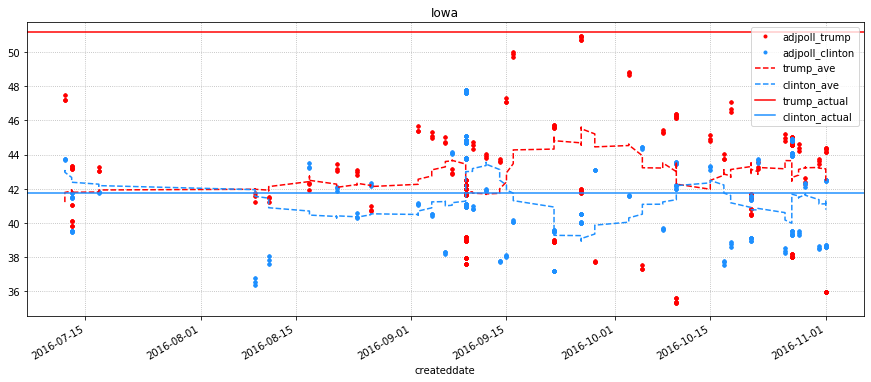

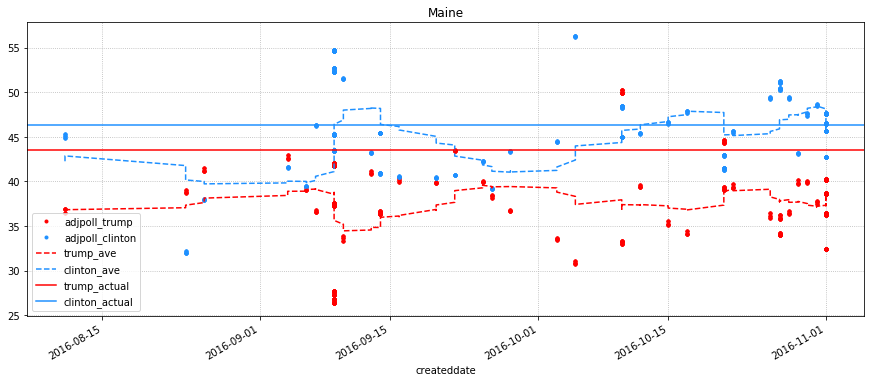

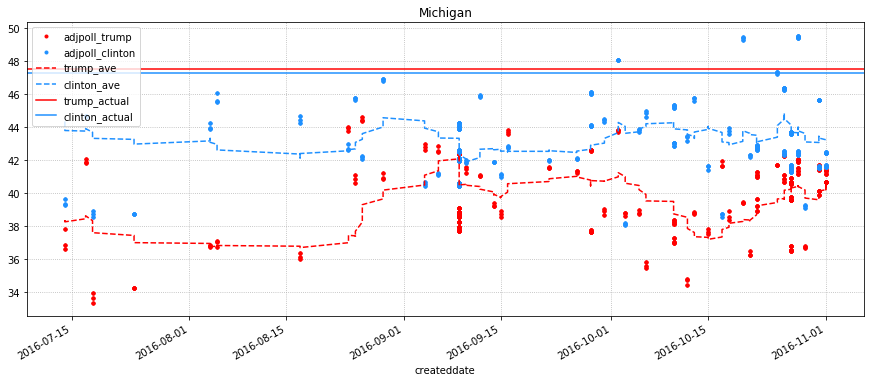

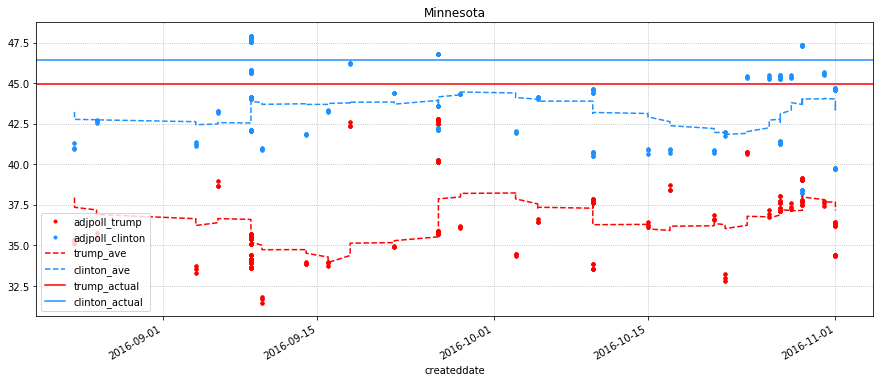

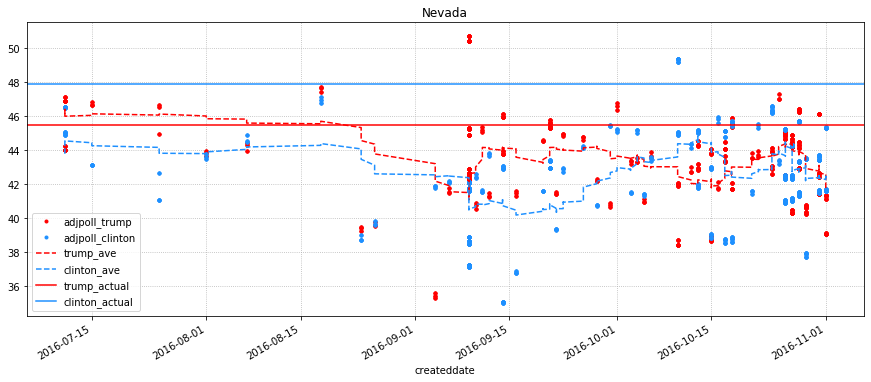

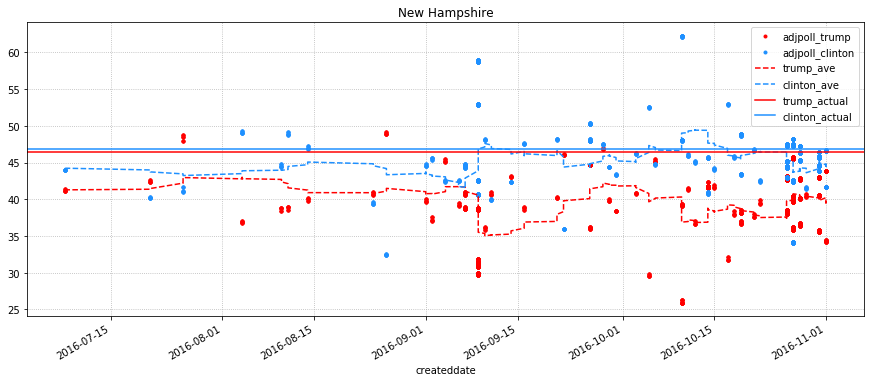

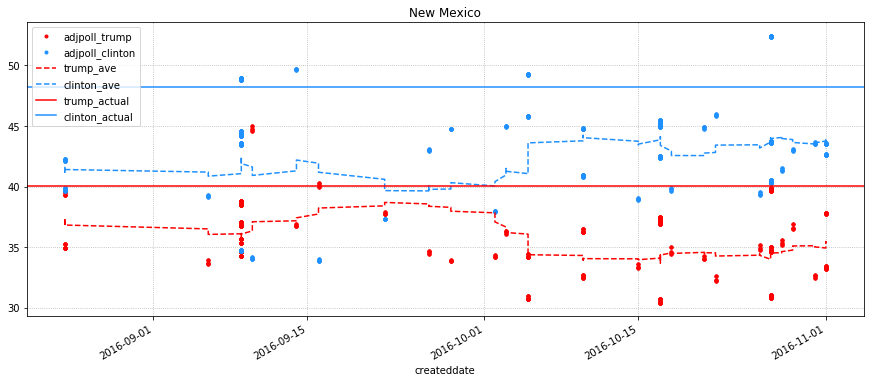

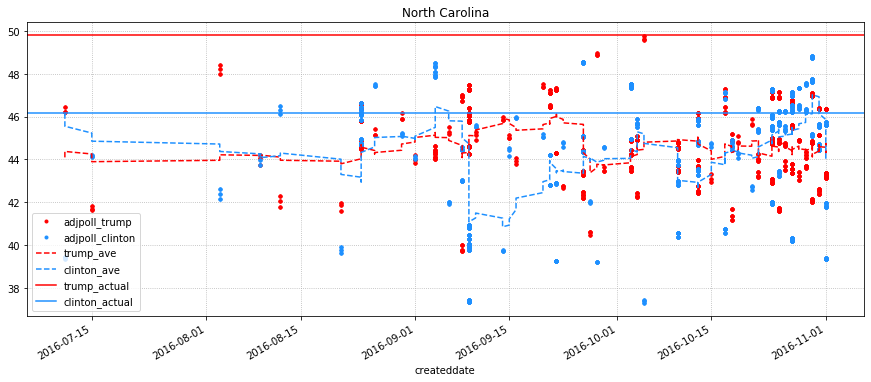

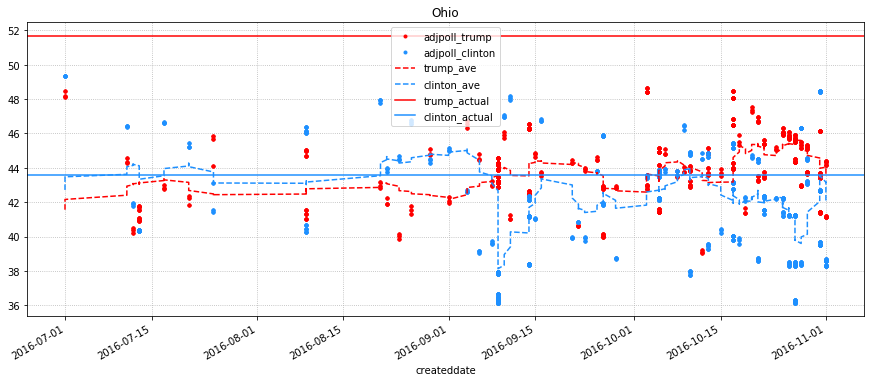

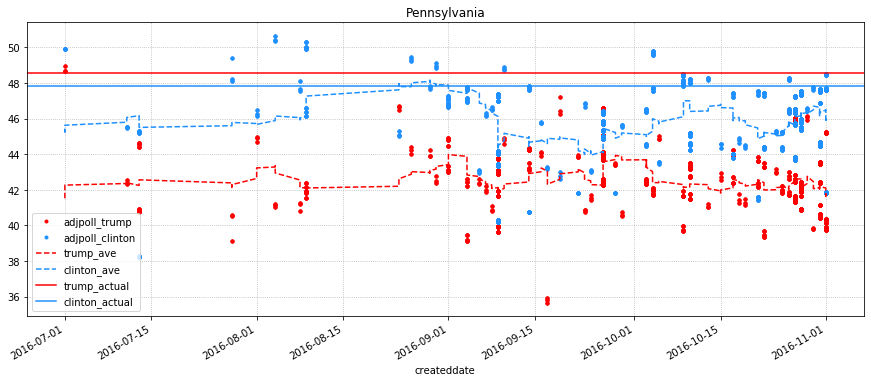

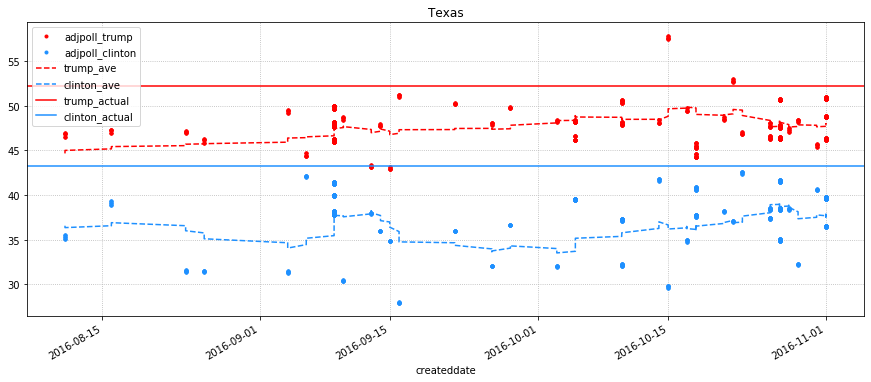

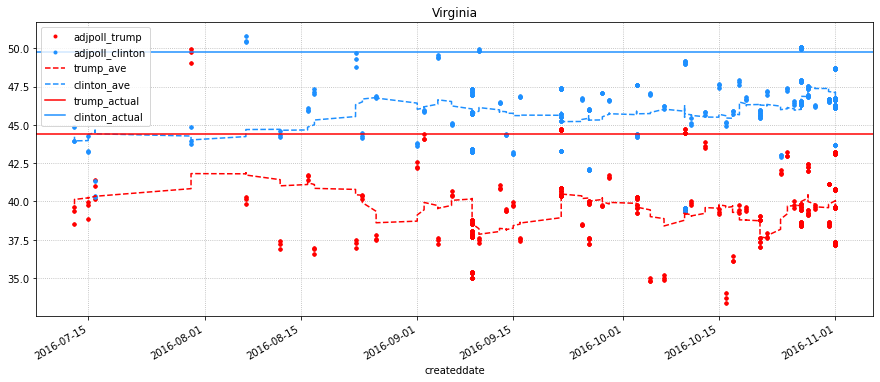

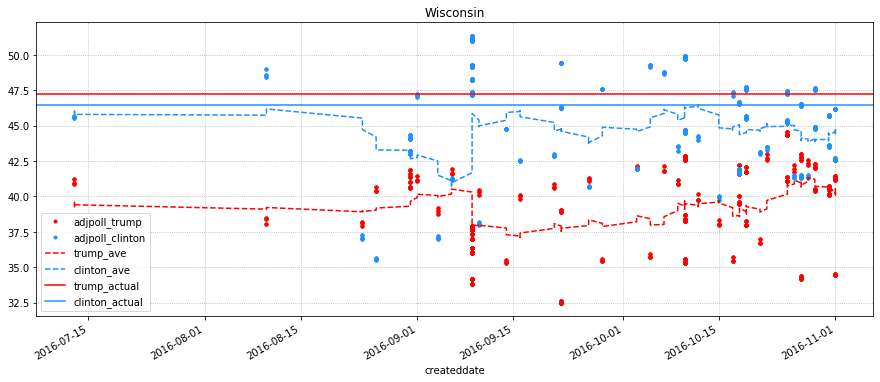

In [86]:
start_date = "2016-07-01"

for state in battlegrounds:

    plot_df = raw[raw.state == state].set_index("createddate").sort_index()
    plot_df = plot_df[["adjpoll_trump", "adjpoll_clinton"]]
    plot_df_roll = plot_df.rolling(window=20, min_periods=3).mean()
    plot_df_roll.columns = ["trump_ave", "clinton_ave"]
    plot_df = plot_df.merge(plot_df_roll, left_index=True, right_index=True, how="left")
    
    ts.plot(plot_df, style=[".", ".", "--", "--"], start_date=start_date, color=2*party_colors)
    
    dem_result = state_shares.loc["2016", state].democrat[0]
    rep_result = state_shares.loc["2016", state].republican[0]
    
    plt.axhline(y=rep_result, linestyle="-", color="red", label="trump_actual");
    plt.axhline(y=dem_result, linestyle="-", color="dodgerblue", label="clinton_actual");
    plt.title(state)
    plt.legend()
    plt.show()

## Including margin for error